# Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 05.10.2021

Мягкий дедлайн: 23:59MSK 28.10.2021

Жесткий дедлайн: 23:59MSK 28.10.2021

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{penalty} = M_{full} \cdot 0.85^{t/1440}$, где $M_{full}$ &mdash; полная оценка за работу без учета штрафа, а $t$ &mdash; время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше **8.5**, а если сдать перед самым жестким дедлайном, то ваш максимум &mdash; **5.22** балла.

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит предсказывать год выпуска песни по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [1]:
# !pip install torch

In [2]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import random
import torchvision
from tqdm import tqdm
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# !wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

In [4]:
df = pd.read_csv('data.txt.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [5]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

**Решение.** У меня есть обучающая выборка `X_train`. Обучу на ней регрессию. Также отскейлю данные с помощью `MinMaxScaler`.

In [6]:
import sklearn
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [7]:
model = Ridge()
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

y_train = y_train.reshape(-1, 1)
X_train = x_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)

y_test = y_test.reshape(-1, 1)
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred)
y_test = y_scaler.inverse_transform(y_test)
y_train = y_scaler.inverse_transform(y_train)

print("RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

RMSE = 9.5102


Теперь посчитаю качество при наилучшем константном прогнозе. Вспомню, что для RMSE это среднее значение всех ответов.

In [8]:
best_constant = y_train.mean()
print("RMSE with best constant = %.4f" % mean_squared_error(y_test, best_constant * np.ones(y_test.shape),
                                                                 squared=False))

RMSE with best constant = 10.8525


Мне еще понадобится работа с нормализованными признаками:

In [9]:
y_test = y_scaler.transform(y_test)
y_train = y_scaler.transform(y_train)

## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.76 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знайте, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [10]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

**Решение.** Немного по-своему напишу функции `test` и `train`, а также зафиксирую `seed`. Для графиков буду использовать массивы `epoch_losses_train` и `epoch_losses_test`.

In [11]:
set_random_seed(64)

In [19]:
train_set = torch.utils.data.TensorDataset(torch.from_numpy(X_train).float(), 
                                            torch.from_numpy(y_train).float())
train_loader = torch.utils.data.DataLoader(train_set, 
                                            batch_size=750, shuffle=True)
test_set = torch.utils.data.TensorDataset(torch.from_numpy(X_test).float(), 
                                           torch.from_numpy(y_test).float())
test_loader = torch.utils.data.DataLoader(test_set, 
                                            batch_size=750)

In [20]:
model = nn.Sequential(
                    nn.BatchNorm1d(X.shape[1]),
                    nn.Linear(X.shape[1], 275),
                    nn.BatchNorm1d(275),
                    nn.ReLU(),
                    nn.Dropout(p=0.45),
                    nn.BatchNorm1d(275),
                    nn.Linear(275, 128),
                    nn.BatchNorm1d(128),
                    nn.ReLU(),
                    nn.Dropout(p=0.5),
                    nn.BatchNorm1d(128),
                    nn.Linear(128, 94),
                    nn.BatchNorm1d(94),
                    nn.ReLU(),
                    nn.Dropout(p=0.25),
                    nn.BatchNorm1d(94),
                    nn.Linear(94, 1)
                    )

optimizer = torch.optim.Adam(model.parameters(), lr=0.000475, weight_decay = 0.00000015)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.00008)
criterion = nn.MSELoss()

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

Sequential(
  (0): BatchNorm1d(90, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): Linear(in_features=90, out_features=275, bias=True)
  (2): BatchNorm1d(275, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): ReLU()
  (4): Dropout(p=0.45, inplace=False)
  (5): BatchNorm1d(275, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Linear(in_features=275, out_features=128, bias=True)
  (7): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Dropout(p=0.5, inplace=False)
  (10): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Linear(in_features=128, out_features=94, bias=True)
  (12): BatchNorm1d(94, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): ReLU()
  (14): Dropout(p=0.25, inplace=False)
  (15): BatchNorm1d(94, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (16): Linear(in_features=94, out_f

In [22]:
epoch_losses_train = []
epoch_losses_test = []

In [23]:
def train(model, criterion, optimizer, train_loader):
    model.train()
    batches_count = len(test_loader)
    for x_batch, y_batch in tqdm(train_loader):
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    epoch_losses_train.append(math.sqrt(loss))

def test(model, criterion, test_loader):
    model.eval()
    with torch.no_grad():
        epoch_loss = 0
        batches_count = len(test_loader)
        loss_count = 0
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred = model(x_batch)
            
            y_pred = y_scaler.inverse_transform(y_pred)
            y_batch = y_scaler.inverse_transform(y_batch)
            
            batch_loss = np.mean(np.square(y_pred - y_batch))
            epoch_loss += batch_loss
        epoch_loss = math.sqrt(epoch_loss / batches_count)
        print(epoch_loss)
    epoch_losses_test.append(epoch_loss)

  0%|          | 1/619 [00:00<01:19,  7.77it/s]

1 epoch


  1%|          | 4/619 [00:00<00:16, 37.03it/s]

12.134864660209262
2 epoch


  1%|▏         | 9/619 [00:00<00:13, 45.28it/s]

10.438544384129306
3 epoch


  0%|          | 2/619 [00:00<00:32, 19.11it/s]

9.60908896744088
4 epoch


  1%|          | 5/619 [00:00<00:14, 42.57it/s]

9.362184110397099
5 epoch


  1%|          | 4/619 [00:00<00:18, 33.23it/s]

9.23166799954829
6 epoch


  1%|          | 5/619 [00:00<00:14, 42.81it/s]

9.122551186828614
7 epoch


  1%|          | 4/619 [00:00<00:20, 30.69it/s]

9.088975026054193
8 epoch


  1%|          | 5/619 [00:00<00:14, 42.34it/s]

9.03768059815157
9 epoch


100%|██████████| 619/619 [00:13<00:00, 47.53it/s]


8.983031311943646


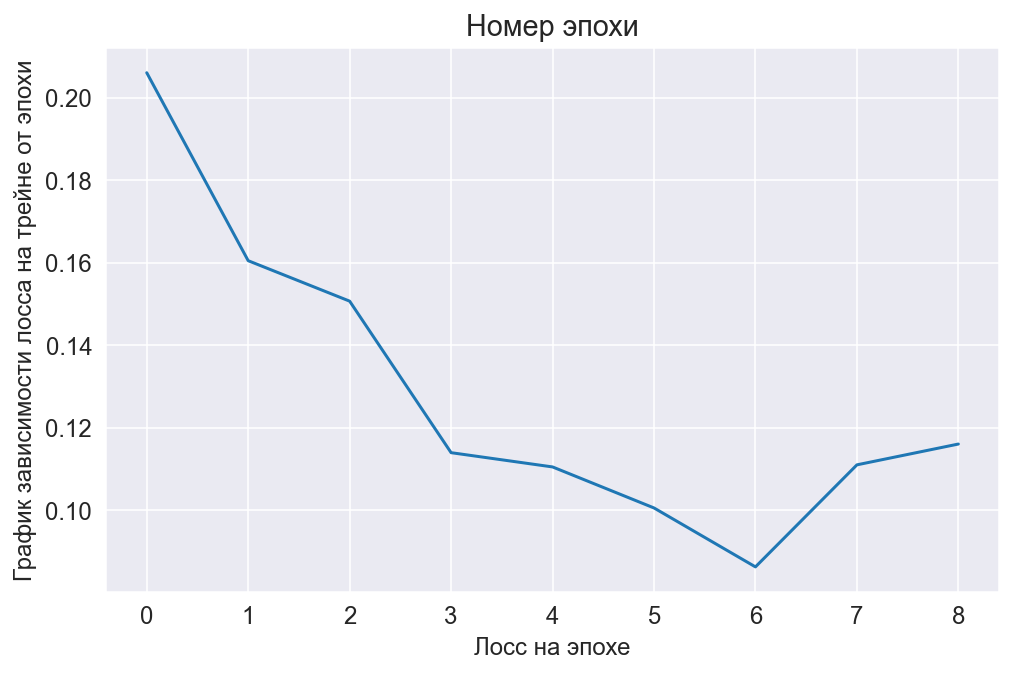

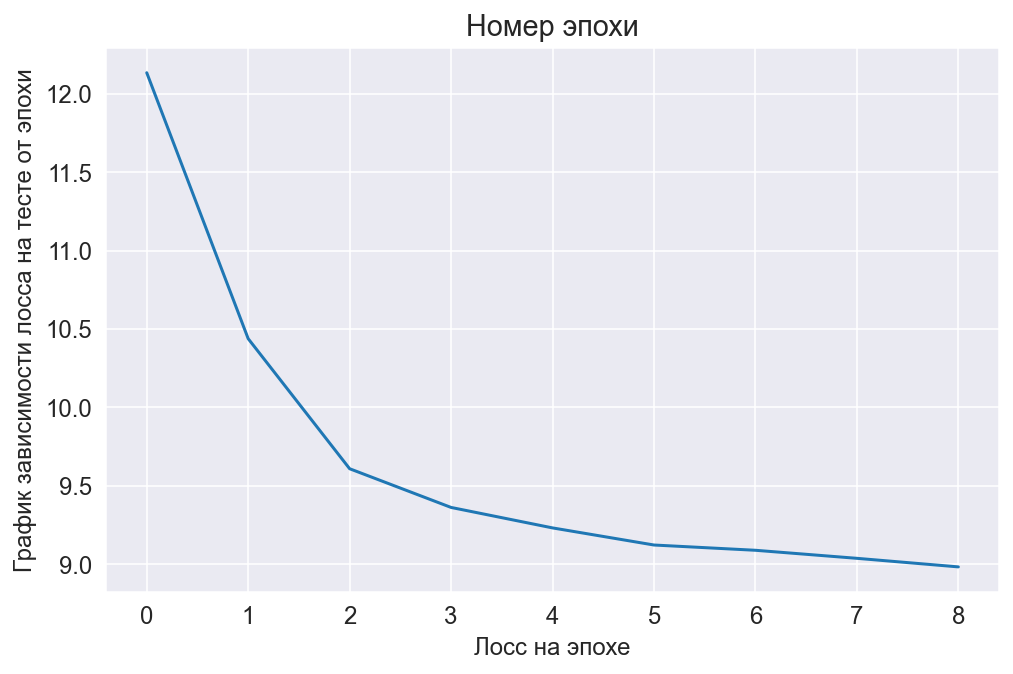

  1%|          | 7/619 [00:00<00:16, 37.15it/s]

10 epoch


  1%|          | 5/619 [00:00<00:13, 44.46it/s]

8.936149391284228
11 epoch


  1%|          | 5/619 [00:00<00:14, 43.78it/s]

8.930398150493295
12 epoch


  1%|          | 4/619 [00:00<00:15, 39.96it/s]

8.883308687669825
13 epoch


  0%|          | 3/619 [00:00<00:20, 29.64it/s]

8.889292720496691
14 epoch


  1%|          | 4/619 [00:00<00:18, 34.14it/s]

8.832558082170978
15 epoch


  1%|          | 4/619 [00:00<00:18, 33.32it/s]

8.824742950974487
16 epoch


  1%|          | 5/619 [00:00<00:14, 43.79it/s]

8.79265319326059
17 epoch


  1%|          | 5/619 [00:00<00:14, 43.77it/s]

8.787186818259098
18 epoch


100%|██████████| 619/619 [00:13<00:00, 47.41it/s]


8.788325345861542


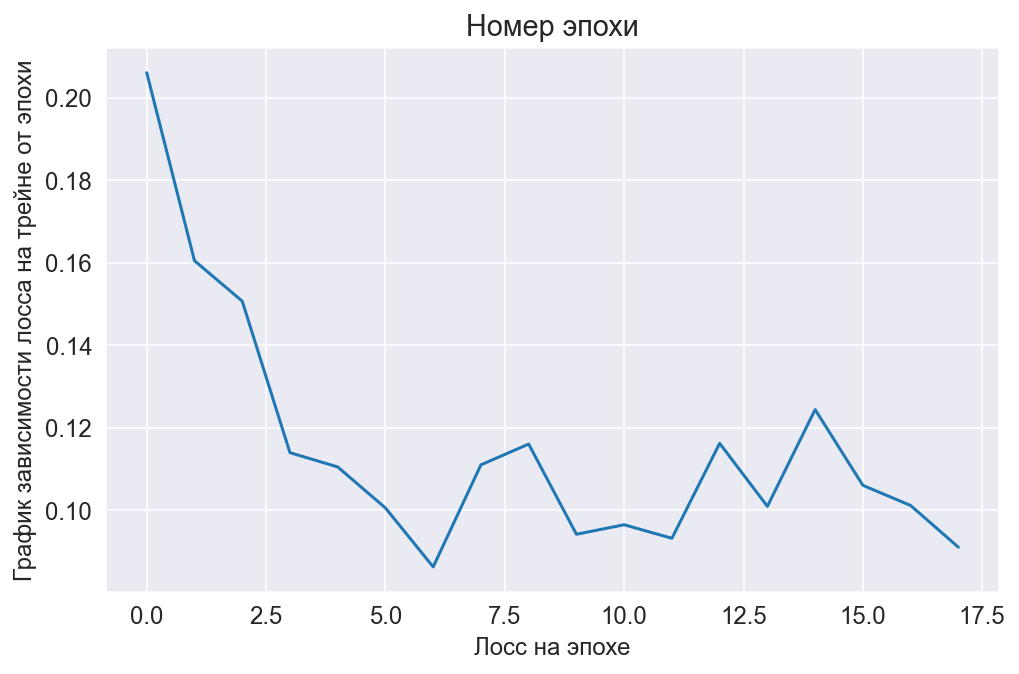

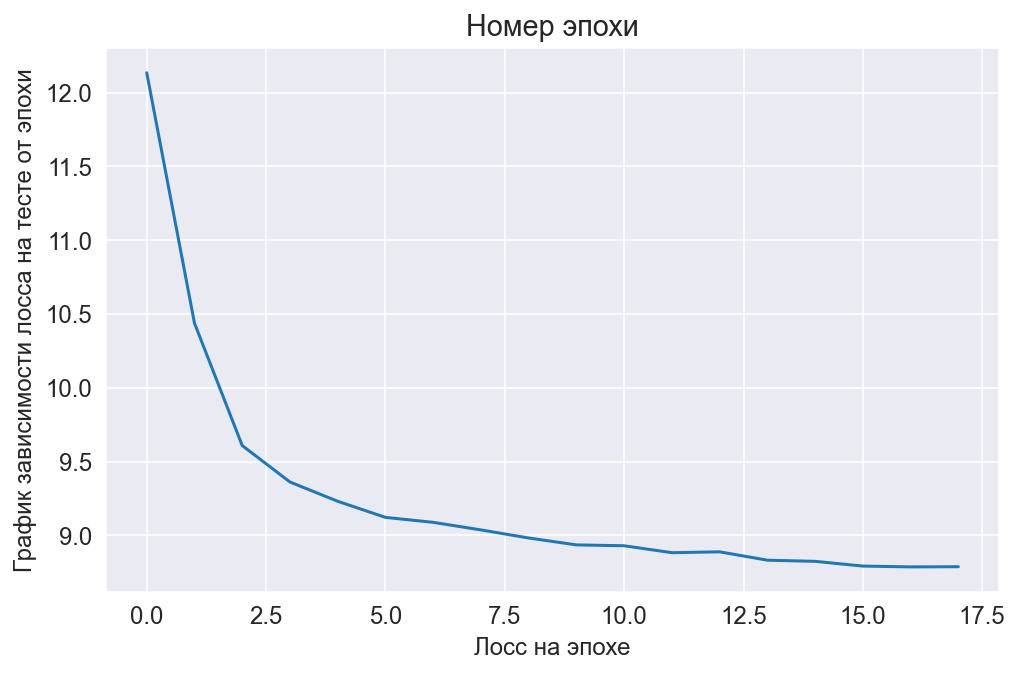

  1%|          | 5/619 [00:00<00:14, 42.02it/s]

19 epoch


  1%|          | 5/619 [00:00<00:14, 43.21it/s]

8.770367837122661
20 epoch


  1%|          | 4/619 [00:00<00:16, 38.40it/s]

8.760285580089581
21 epoch


  1%|          | 5/619 [00:00<00:14, 42.62it/s]

8.755476097585074
22 epoch


  1%|          | 5/619 [00:00<00:13, 44.15it/s]

8.765928365116663
23 epoch


  1%|          | 4/619 [00:00<00:16, 37.84it/s]

8.768934514571313
24 epoch


  1%|          | 4/619 [00:00<00:16, 37.54it/s]

8.735856196994083
25 epoch


  1%|          | 5/619 [00:00<00:13, 45.10it/s]

8.734067268749417
26 epoch


  1%|          | 5/619 [00:00<00:14, 42.33it/s]

8.725869439094396
27 epoch


100%|██████████| 619/619 [00:12<00:00, 47.84it/s]


8.738708339953991


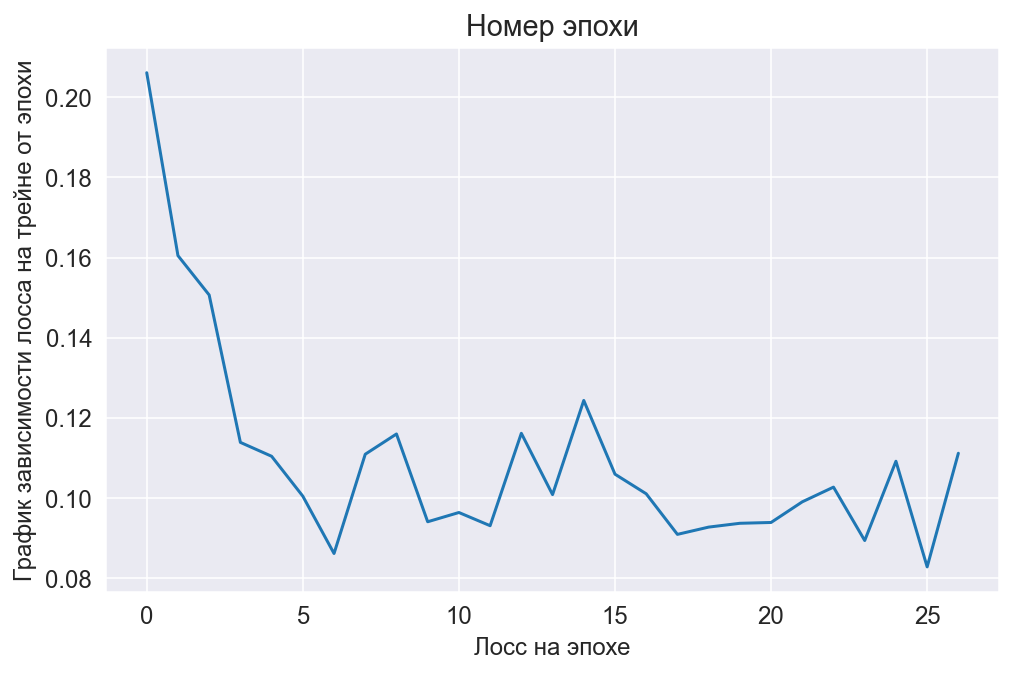

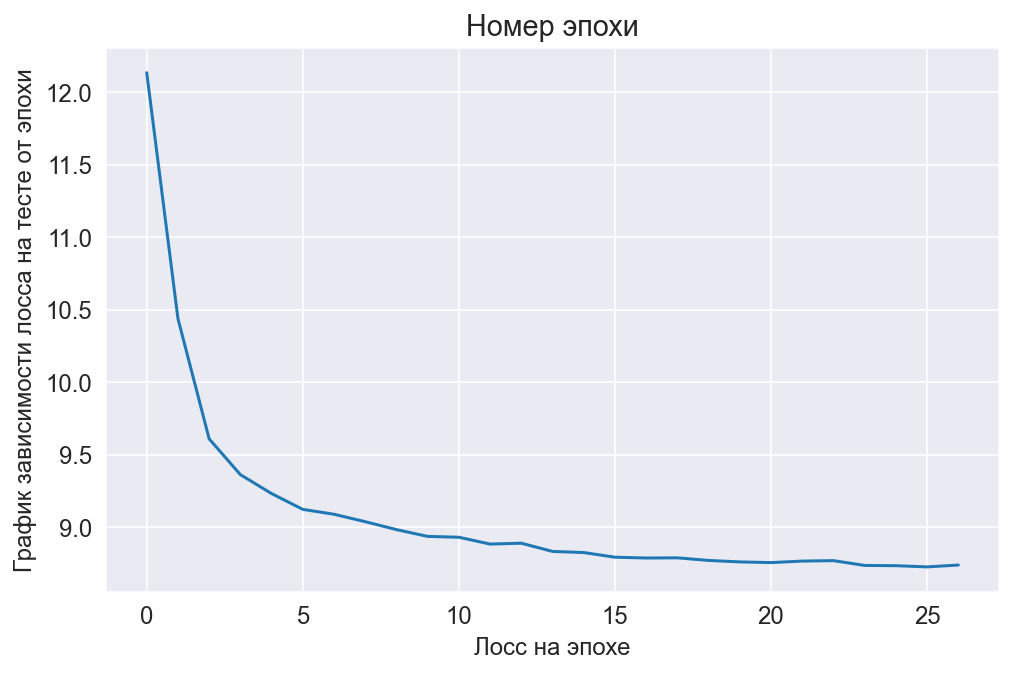

  1%|          | 4/619 [00:00<00:15, 38.62it/s]

28 epoch


  1%|          | 5/619 [00:00<00:14, 42.47it/s]

8.73529669520892
29 epoch


  1%|          | 5/619 [00:00<00:14, 43.82it/s]

8.72703612300093
30 epoch


  1%|          | 5/619 [00:00<00:14, 43.85it/s]

8.742922730434746
31 epoch


  1%|          | 5/619 [00:00<00:14, 43.68it/s]

8.742485106545542
32 epoch


  1%|          | 5/619 [00:00<00:14, 42.83it/s]

8.722774222349178
33 epoch


  1%|          | 5/619 [00:00<00:18, 33.07it/s]

8.716518287661938
34 epoch


  1%|          | 5/619 [00:00<00:13, 44.06it/s]

8.713992990872319
35 epoch


100%|██████████| 619/619 [00:12<00:00, 47.81it/s]


8.714842114511448


In [24]:
for epoch in range(35):
    print(epoch + 1, "epoch")
    train(model, criterion, optimizer, train_loader)
    test(model, criterion, test_loader)
    if (epoch + 1) % 9 == 0:
        sns.lineplot(data=epoch_losses_train)

        %config InlineBackend.figure_format = "retina"
        plt.rcParams["figure.figsize"] = 8, 5
        plt.rcParams["font.size"] = 12
        sns.set_style("darkgrid")

        plt.title("Номер эпохи")
        plt.xlabel("Лосс на эпохе")
        plt.ylabel("График зависимости лосса на трейне от эпохи")

        plt.show()
        
        sns.lineplot(data=epoch_losses_test)

        %config InlineBackend.figure_format = "retina"
        plt.rcParams["figure.figsize"] = 8, 5
        plt.rcParams["font.size"] = 12
        sns.set_style("darkgrid")

        plt.title("Номер эпохи")
        plt.xlabel("Лосс на эпохе")
        plt.ylabel("График зависимости лосса на тесте от эпохи")

        plt.show()

**Ответ.** Получилось качество $\leq$ 8.8 (и, кажется, даже $\leq$ 7.6) за 35 эпох — прекрасно!

## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

##### Отчет

История того, как я пришел к этой модели, довольно долгая! Я хотел двигаться поступательно, осторожно пробуя все новые улучшения модели.

1. Изначально я решил сделать просто некую "нелинейную надстройку" над Ridge-регрессией — линейный слой + ReLU + линейный слой + `weight_decay` для осуществления $\ell_2$-регуляризации. Данные я решил разбивать на 64 батча, в линейном слое использовал 132 нейрона, в качестве `lr` и `weight_decay` выбрал случайные небольшие числа — 0.0000385 и 0.0000000001 соответственно. Результат очень порадовал — я увидел, что `RMSE` на тесте монотонно умньшается с каждой новой эпохой и решил ради интереса посмотреть, как быстро оно будет сходиться. Что ж, получилось 9.013320139873336 за 450 эпох... Но я обрадовался (все же это лучше, чем Ridge) и даже еще попробовал подкрутить параметры — и вот уже `lr=0.00004, weight_decay = 0.00000000013` дало качество 9.135651199117936 за 150 эпох, `lr=0.000067, weight_decay = 0.00000000015` — 9.08269829211832 за 150 эпох. Это все, конечно, хорошо, но после третьего эксперимента стало точно понятно, что архитектуру надо менять, чтобы улучшить сходимость.

Код, кстати выглядел так:
```
model = nn.Sequential()
model.add_module('l1', nn.Linear(X.shape[1], 132))
model.add_module('l2', nn.ReLU())
model.add_module('l3', nn.Linear(132, 1))

optimizer = torch.optim.Adam(model.parameters(), lr=0.0000385, weight_decay = 0.0000000001)
criterion = nn.MSELoss()
```

2. Времени у меня очень много, так что я решил начать с малого и просто добавить еще линейный слой + ReLU:

```
model = nn.Sequential()
model.add_module('l1', nn.Linear(X.shape[1], 105))
model.add_module('l2', nn.ReLU())
model.add_module('l3', nn.Linear(105, 64))
model.add_module('l4', nn.ReLU())
model.add_module('l5', nn.Linear(64, 1))

optimizer = torch.optim.Adam(model.parameters(), lr=0.000089, weight_decay = 0.00000005)
criterion = nn.MSELoss()
```

Получилось 9.006224221270818 за 150 эпох — еще лучше, но не принципиально. 

3. Я почитал немного про методы регуляризации в нейронных сетях и решил навесить Dropout-слои:

```
model = nn.Sequential()
model.add_module('l1', nn.Linear(X.shape[1], 105))
model.add_module('l2', nn.ReLU())
model.add_module('l3', nn.Dropout(p=0.5))
model.add_module('l4', nn.Linear(105, 64))
model.add_module('l5', nn.ReLU())
model.add_module('l6', nn.Dropout(p=0.2))
model.add_module('l7', nn.Linear(64, 1))

optimizer = torch.optim.Adam(model.parameters(), lr=0.000035, weight_decay = 0.00000002)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.00001)
criterion = nn.MSELoss()
```

Вообще, изначально я поставил 0.5 и 0.5 в качестве параметра в оба Dropout-слоя, однако позже стал экспериментально подбирать более хорошие значения и заметил, что чем выше значение на первом Dropout-слое и чем ниже на втором, тем обучение лучше. Также экспериментальным путем я подбирал `lr` — начиная от 0.000089 до 0.000010 с шагом в -0.000010. Было получено, что 0.000035 лучше всего, аналогично с `weight_decay` — там я смотрел на значения от 0.00000005 до 0.000000020 и выяснил, что наилучшим является именно выбранное. Также я пробовал ради интереса заменять слой `l5` на `Sigmoid()`, но получилось хуже, чем было, и я решил в качестве нелинейного слоя всегда использовать только `ReLU()`. Результаты несильно порадовали! За 200 эпох с Dropout 8.976083138775666, без него — 8.977876706835668. Улучшения в рамках погрешности, эпох невероятно много, но зато уже на 4/10...

4. Тогда я вновь решил поменять архитектуру (все равно игра с параметрами сеток из пунктов 2–3 ни к чему не приводила) и почитал про батчнормы. При этом подумал, что Dropout пока лучше оставить один — для сразу двух сложно подбирать параметры и они в любом случае ничего особо не улучшили. 

При этом меня стало бесить постоянно поправлять цифры в `l1`, ..., `l7` при изменении слоев, так что я еще узнал, как по-другому добавлять слои в сетку! И написал следующее:

```
model = nn.Sequential(
                    nn.BatchNorm1d(X.shape[1]),
                    nn.Linear(X.shape[1], 105),
                    nn.BatchNorm1d(105),
                    nn.ReLU(),
                    nn.Dropout(p=0.5),
                    nn.BatchNorm1d(105),
                    nn.Linear(105, 1)
                    )

optimizer = torch.optim.Adam(model.parameters(), lr=0.000035, weight_decay = 0.00000002)
criterion = nn.MSELoss()
```

Я заметил, что сходимость можно увеличить — и остановил модель, решив ради интереса написать `lr=0.000535`. На тот момент я делал эту домашку уже не один день и именно в этот вечер преподаватель явно написал, что нужно отскейлить не только признаки, но и таргет, при этом я написал вот эту архитектуру и счастью не было предела! RMSE 9.337 за 27 эпох!! Это очень сильно обнадежило — теперь хоть скорость работы адекватная. Идем дальше!

В результате 20 экспериментов (после нескольких запусков нейронок на 450 эпохах это казалось не таким уж долгим) с `lr`, `weight_decay`, размером батчей я увеличил размер батчей с 64 до 256, дальше до 512 и до 515 (внезапно именно 515 было чуточку лучше, а уже 525 давало сравнительно ужасный результат), замеил, что ближе к концу обучения RMSE сильно прыгает и подумал, что было бы неплохо уменьшать ближе к концу `lr` — и ущнал про `scheduler`, также я постепенно увеличивал количество нейронов, остановившись на 275 как на наилучшем варианте — дальше скорость обучения и качество начинало падать. Также я пробовал параметр Dropout варьировать с 0.75 до 0.3 с шагом 0,05 и никаких улучшений после 0.4 не было.

В результате!!! Получилось следующее:

```
model = nn.Sequential(
                    nn.BatchNorm1d(X.shape[1]),
                    nn.Linear(X.shape[1], 275),
                    nn.BatchNorm1d(275),
                    nn.ReLU(),
                    nn.Dropout(p=0.4),
                    nn.BatchNorm1d(275),
                    nn.Linear(275, 1)
                    )

optimizer = torch.optim.Adam(model.parameters(), lr=0.000535, weight_decay = 0.00000015)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.0001)
criterion = nn.MSELoss()
```

И оно дало невероятные 8.998 на 35 эпохах!!! Это было 27.10... Я уже не надеялся на хорошую оценку... 

5. Жажда хорошей оценки взяла свое! Все дальнейшие эксперименты с гиперпаметрами не давали совершенно ничего хорошего — и я понял, что пора менять саму архитектуру и добавить еще один линейный слой.

Получилось вот что, второй дропаут, выучив урок из прошлых нейронок, сделал с параметром поменьше:

```
model = nn.Sequential(
             nn.BatchNorm1d(X.shape[1]),
             nn.Linear(X.shape[1], 275),
             nn.BatchNorm1d(275),
             nn.ReLU(),
             nn.Dropout(p=0.4),
             nn.BatchNorm1d(275),
             nn.Linear(275, 128),
             nn.BatchNorm1d(128),
             nn.ReLU(),
             nn.Dropout(p=0.2),
             nn.BatchNorm1d(128),
             nn.Linear(128, 1)
             )
             
optimizer = torch.optim.Adam(model.parameters(), lr=0.000535, weight_decay = 0.00000015) scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.0001) 
criterion = nn.MSELoss()
```

Качество улучшилось, но начало прыгать у 8.91! Надо улучшать дальше. Я стал экспериментировать с дропаутом — и вышло, что у второго дропаута с параметром 0.1 скачки начинаются уже у 8.87. Эксперименты с `weight_decay` вообще ничего не дали — я понял, что он у меня сейчас оптимальный. Спустя еще 20 экспериментов с разными `weight_decay`, дропаутами я понял, что надо пробовать добавлять третий слой — раз эта архитектура исчерпала себя, нужно снова ее менять, улучшая изученными средствами!

6. Вышло следующее:

```
model = nn.Sequential(
             nn.BatchNorm1d(X.shape[1]),
             nn.Linear(X.shape[1], 275),
             nn.BatchNorm1d(275),
             nn.ReLU(),
             nn.Dropout(p=0.4),
             nn.BatchNorm1d(275),
             nn.Linear(275, 128),
             nn.BatchNorm1d(128),
             nn.ReLU(),
             nn.Dropout(p=0.1),
             nn.BatchNorm1d(128),
             nn.Linear(128, 94),
             nn.BatchNorm1d(94),
             nn.ReLU(),
             nn.Dropout(p=0.0005),
             nn.BatchNorm1d(94),
             nn.Linear(94, 1)
             )
             
optimizer = torch.optim.Adam(model.parameters(), lr=0.000535, weight_decay = 0.00000015) scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.0001) 
criterion = nn.MSELoss()
```

Немного поэкспериментировав с гиперпараметрами (в первую очередь, со `scheduler`, поскольку я в первую очерндь хотел избежать многочисленных прыжков), я пришел к 

```
model = nn.Sequential(
             nn.BatchNorm1d(X.shape[1]),
             nn.Linear(X.shape[1], 275),
             nn.BatchNorm1d(275),
             nn.ReLU(),
             nn.Dropout(p=0.4),
             nn.BatchNorm1d(275),
             nn.Linear(275, 128),
             nn.BatchNorm1d(128),
             nn.ReLU(),
             nn.Dropout(p=0.1),
             nn.BatchNorm1d(128),
             nn.Linear(128, 94),
             nn.BatchNorm1d(94),
             nn.ReLU(),
             nn.Dropout(p=0.0005),
             nn.BatchNorm1d(94),
             nn.Linear(94, 1)
             )
optimizer = torch.optim.Adam(model.parameters(), lr=0.000530, weight_decay = 0.00000015) 
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=14, gamma=0.00017) 
criterion = nn.MSELoss()
```

Она уже была близка к заветным 8.8!

Еще немного бесплодных экспериментов — и я пришел к финальной версии модели:

```
model = nn.Sequential(
                    nn.BatchNorm1d(X.shape[1]),
                    nn.Linear(X.shape[1], 275),
                    nn.BatchNorm1d(275),
                    nn.ReLU(),
                    nn.Dropout(p=0.45),
                    nn.BatchNorm1d(275),
                    nn.Linear(275, 128),
                    nn.BatchNorm1d(128),
                    nn.ReLU(),
                    nn.Dropout(p=0.5),
                    nn.BatchNorm1d(128),
                    nn.Linear(128, 94),
                    nn.BatchNorm1d(94),
                    nn.ReLU(),
                    nn.Dropout(p=0.25),
                    nn.BatchNorm1d(94),
                    nn.Linear(94, 1)
                    )

optimizer = torch.optim.Adam(model.parameters(), lr=0.000475, weight_decay = 0.00000015)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.00008)
criterion = nn.MSELoss()
```

Она дала 8.793285671101179 за 35 эпох, я очень обрадовался и решил, что трогать ни гиперпараметры, ни архитектуру уже не надо — все и так найдено отлично.

Осталось добавить еще защиту от переобучения — пошаффлить данные в `train_loader`. Теперь он выглядит следующим образом: `train_loader = torch.utils.data.DataLoader(train_set, 
                                            batch_size=750, shuffle=True)`
                                            
Конец!